# Convolutional Neural Networks 
---

#### Example CNN

The typical architecture of CNNs has a couple of convolutional layers, followed by _fully connected_ layer, i.e. feed forward NN.

In some of the most famous CNN architectures it is common to alternate convolutional and pooling layers, like this. Shown below is one of the classical CNN architecture, LeNet-5.

<img src='cnn_with_poolin.jpeg' >

## CNNs in Keras

In [1]:
from tensorflow.keras import backend as K
import tensorflow.keras as tk
from tensorflow.keras.datasets import mnist, fashion_mnist,cifar10
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Dense, MaxPooling2D, Flatten, BatchNormalization,Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

2023-05-24 11:05:31.587998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Preprocess the data:

In [2]:
# Load data:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [3]:
# Check shapes:
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
# To feed the images in a CNN we need to reshape our X data to the format 
# (batch/sample, width, heigth, channels):
# The mnist data are black and white images so we need just 1 color channel

Xtrain = xtrain.reshape(60000, 28, 28,1)
Xtest = xtest.reshape(10000, 28, 28,1)

In [5]:
# Always keep checking shapes:
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain shape:', ytrain.shape)

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain shape: (60000,)


In [6]:
Xtrain

array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


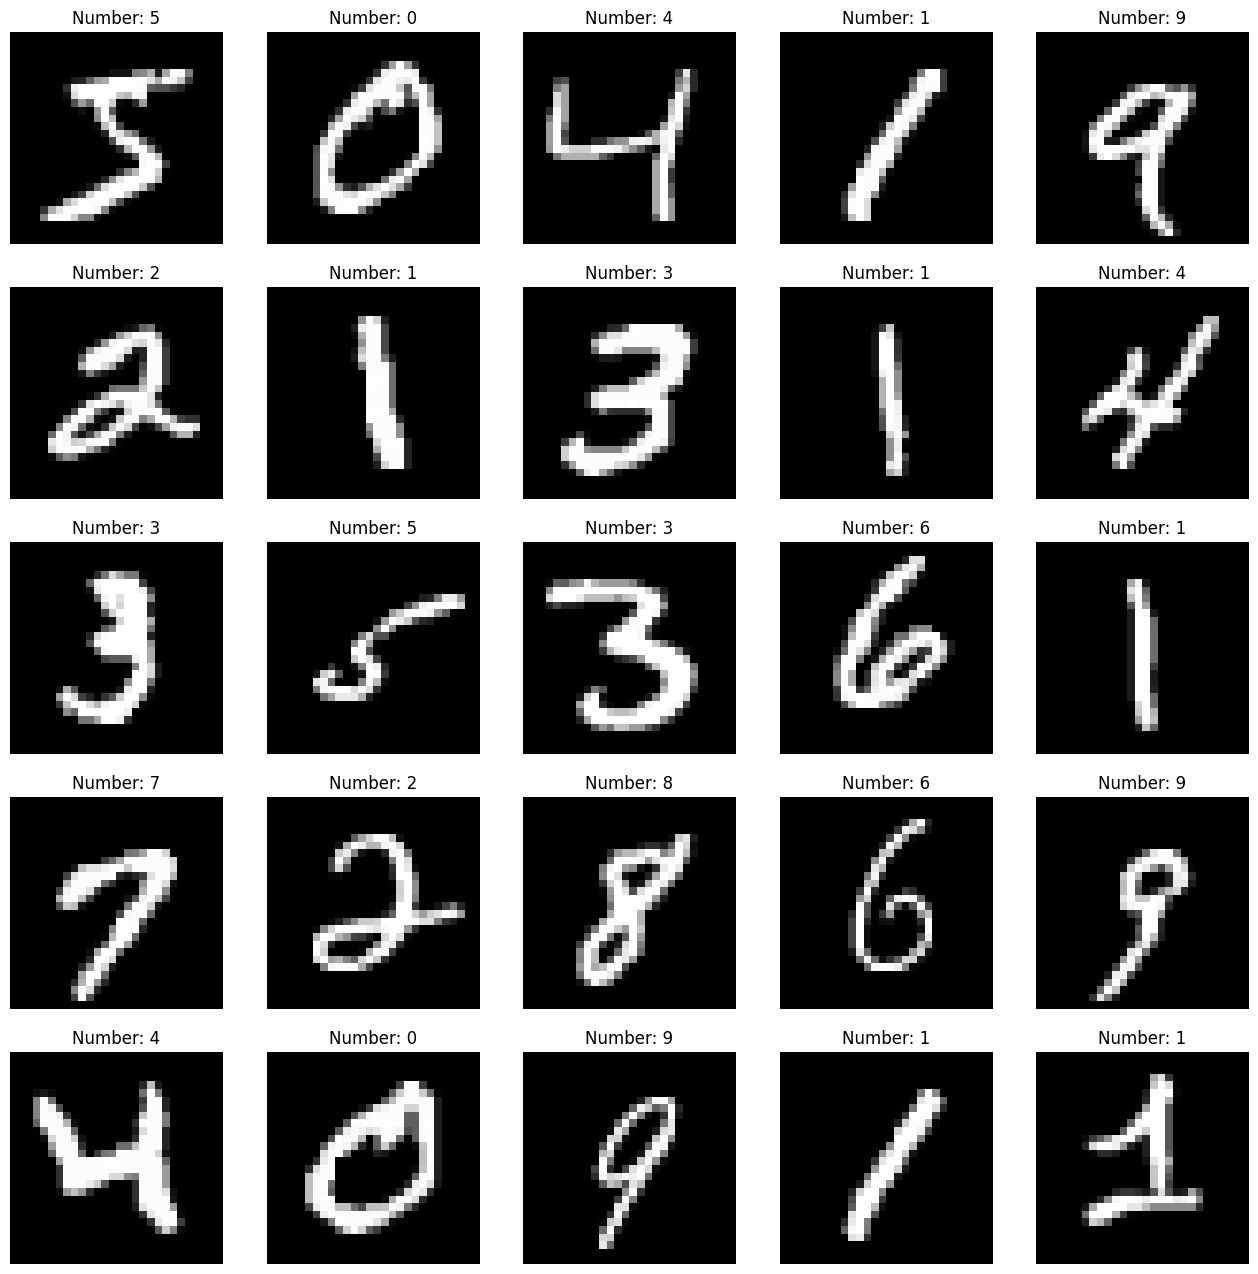

In [8]:
# plot the train images  with the labels
plt.figure(figsize=(16,16))
for i in range(25):
    plt.subplot(5, 5, i+1,title=f'Number: {ytrain[i]}')
    plt.imshow(xtrain[i],cmap='gray')
    plt.axis('off')

In [9]:
# The labels are 10 numbers (0...9) we transform it into 10 classes 
# ytrain, ytest from number to categorical/dummies

ytrain_cat = to_categorical(ytrain)
ytest_cat = to_categorical(ytrain)

In [10]:
ytrain_cat.shape

(60000, 10)

In [11]:
ytrain_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [12]:
# from categorical to number
np.argmax(ytrain_cat,axis=1),np.argmax(ytest_cat,axis=1)

(array([5, 0, 4, ..., 5, 6, 8]), array([5, 0, 4, ..., 5, 6, 8]))

In [13]:
print('After preprocessing also y:\n')
print('Xtrain shape:', Xtrain.shape)
print(Xtrain.shape[0], 'train samples')
print(Xtest.shape[0], 'test samples')
print(Xtrain[0].shape, 'image shape')
print('ytrain cat shape:', ytrain_cat.shape)

After preprocessing also y:

Xtrain shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(28, 28, 1) image shape
ytrain cat shape: (60000, 10)


#### LeNet-5 in Keras

Implement LeNet-5 architecture from above. 

Use `relu` activation function for convolutional and fully-connected (dense) layers, and `softmax` for the output layer.

Q: How do we deal with the fact that our images (28x28) are smaller than the input images in LeNet-t (32, 32)?

Links to layers documentation:
+ [Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)
+ [MaxPooling2D](https://keras.io/api/layers/pooling_layers/max_pooling2d/)
+ [Flatten](https://keras.io/api/layers/reshaping_layers/flatten/)
+ [Dense](https://keras.io/api/layers/core_layers/dense/)
+ [Weight Initializers](https://keras.io/api/layers/initializers/)
+ [Activation Functions](https://keras.io/api/layers/activations/)


<img src='cnn_with_poolin.jpeg' width=600 heigth=600>

In [44]:
### Implement LeNet-5 architecture 
K.clear_session()
model = Sequential([
    
    ### Convolutional layers
    Conv2D(filters = 6 , kernel_size = (5,5), 
           strides = (1,1), padding = "valid", 
           activation = tk.activations.relu, input_shape = (28, 28, 1), # use relu
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)),  # how to initialise the model parameters
           
    
    MaxPooling2D(pool_size = (2, 2), strides=(2, 2), padding = "valid"),
    
    Conv2D(filters = 16, kernel_size = (5, 5), 
           strides = (1, 1), padding = "valid" , 
           activation = tk.activations.relu, input_shape = (10, 10, 16),
           kernel_initializer=tk.initializers.GlorotNormal(seed=34)) ,  # use relu
            
    
    MaxPooling2D(pool_size = (2, 2), strides=(2, 2), padding = "valid"),
    
    ### Fully connected layers for classification
    
    Flatten(), # flatten value is 400 and that is given. We don't need to write here
    
    Dense(units=400, activation= "relu"),  # use relu # According to model this value should be 120 but we sat to that 400 to play around
    
    Dense(units=120, activation=tk.activations.relu), # use relu. This should be 84 according to the model.
          
    
    
    # Output layer
    # think of how many categories we have to predict 
    Dense(units= 10, activation=tk.activations.softmax)
])

In [45]:
# Check the summary:
model.summary

<bound method Model.summary of <keras.engine.sequential.Sequential object at 0x7f8d23b3cd60>>

+ [List of optimizers](https://keras.io/api/optimizers/)
+ [List of Loss functions](https://keras.io/api/losses/)

In [46]:
# Compile 
model.compile(optimizer=tk.optimizers.Adam(), # Adam()
              loss=tk.losses.categorical_crossentropy, # multiclass: 'categorical_crossentropy' 
              metrics=['accuracy'])

In [47]:
# Train the model
history = model.fit(Xtrain, ytrain_cat, epochs=20,
                    batch_size=60,
                    validation_split = 0.2,
                   )

Epoch 1/20
800/800 [==============================] - 28s 32ms/step - loss: 0.5171 - accuracy: 0.9020 - val_loss: 0.1426 - val_accuracy: 0.9572
Epoch 2/20
800/800 [==============================] - 26s 32ms/step - loss: 0.1005 - accuracy: 0.9693 - val_loss: 0.1080 - val_accuracy: 0.9693
Epoch 3/20
800/800 [==============================] - 18s 22ms/step - loss: 0.0665 - accuracy: 0.9794 - val_loss: 0.0972 - val_accuracy: 0.9715
Epoch 4/20
800/800 [==============================] - 18s 22ms/step - loss: 0.0497 - accuracy: 0.9846 - val_loss: 0.0936 - val_accuracy: 0.9752
Epoch 5/20
800/800 [==============================] - 17s 21ms/step - loss: 0.0473 - accuracy: 0.9850 - val_loss: 0.0828 - val_accuracy: 0.9766
Epoch 6/20
800/800 [==============================] - 18s 23ms/step - loss: 0.0435 - accuracy: 0.9862 - val_loss: 0.0642 - val_accuracy: 0.9823
Epoch 7/20
800/800 [==============================] - 21s 27ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0798 - val_accuracy:

### Examine the model

In [48]:
history.history

{'loss': [0.517090916633606,
  0.10047732293605804,
  0.06648903340101242,
  0.049710046499967575,
  0.04728957265615463,
  0.04354483634233475,
  0.03843187168240547,
  0.033585142344236374,
  0.04028145596385002,
  0.03065190650522709,
  0.027046646922826767,
  0.026321202516555786,
  0.02245759405195713,
  0.023996800184249878,
  0.02615521475672722,
  0.018282312899827957,
  0.023946411907672882,
  0.020624011754989624,
  0.016509078443050385,
  0.017853759229183197],
 'accuracy': [0.9020416736602783,
  0.9693333506584167,
  0.9793958067893982,
  0.9846041798591614,
  0.9850416779518127,
  0.9862499833106995,
  0.9874791502952576,
  0.9897500276565552,
  0.9877916574478149,
  0.9909374713897705,
  0.9915833473205566,
  0.9922916889190674,
  0.9937083125114441,
  0.9929375052452087,
  0.9926458597183228,
  0.9946041703224182,
  0.9932083487510681,
  0.9945833086967468,
  0.9950624704360962,
  0.9950416684150696],
 'val_loss': [0.14263080060482025,
  0.10803455859422684,
  0.09721134

Text(0.5, 0, 'epochs')

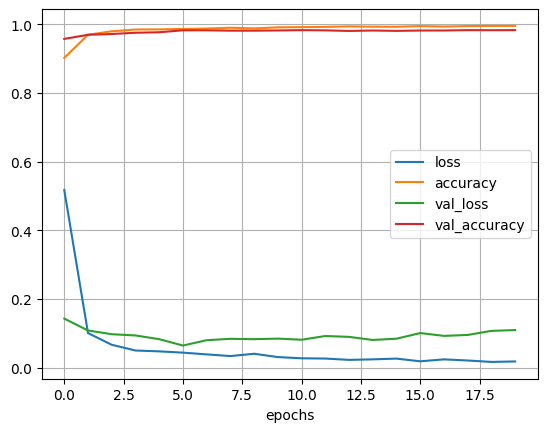

In [49]:
# Plot loss and accuracy curves
pd.DataFrame(data=history.history).plot()
plt.grid(True)
plt.xlabel('epochs')
